# Project: Wrangling and Analyze Data

<p>Importing the required libraries for this project</p>

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import requests
import json
#import tweepy
#from tweepy import OAuthHandler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from timeit import default_timer as timer



## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitterArchive = pd.read_csv('twitter-archive-enhanced-2.csv')
#twitterArchive.head(5)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
'''url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)'''

'url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"\nresponse = requests.get(url)\n\nwith open(url.split(\'/\')[-1], mode=\'wb\') as file:\n    file.write(response.content)'

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [5]:
'''auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)'''

'auth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)'

In [6]:
# NOTE I HAD MOBILE VERIFICATION ISSUES:

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitterArchive.tweet_id.values
len(tweet_ids)

2356

In [7]:
#Type of data
type(tweet_ids)

numpy.ndarray

The nature of data returned by twitter's API

In [8]:
'''for tweet_id in tweet_ids:
    # the .get_status() method of the API helps get all the information about the tweet specified
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    print(tweet)
    break'''

"for tweet_id in tweet_ids:\n    # the .get_status() method of the API helps get all the information about the tweet specified\n    tweet = api.get_status(tweet_id, tweet_mode='extended')\n    print(tweet)\n    break"

Attributes in the python object returned

In [9]:
'''for tweet_id in tweet_ids:
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    # this next line helps us get the attributes in the python object returned
    print(f'The attributes in this python object are: {dir(tweet)}')
    break'''

#print()
#print(type(tweet._json))
#print(tweet._json)

"for tweet_id in tweet_ids:\n    tweet = api.get_status(tweet_id, tweet_mode='extended')\n    # this next line helps us get the attributes in the python object returned\n    print(f'The attributes in this python object are: {dir(tweet)}')\n    break"

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
'''count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'count = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)'

In [11]:
tweets = []
with open('tweet-json.txt','r') as file:
    for line in file:
        #json.loads() method to convert the json string to a python dictionary
        #print(type(json.loads(line)))
        tweet = json.loads(line)
        twitter_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favourite_count = tweet['favorite_count']
        tweets.append({'tweet_id': twitter_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})



## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



> Accessing the twitter archive enhanced dataset


In [12]:
twitterArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitterArchive.duplicated().any()

False

some of 'twitter archive` columns:
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **text** : Some information about the dog
- **name** : the name of the dog


- Missing values (NaN)
- Data types ('tweet_id', 'timestamp' )
- Columns doggo, flooferm, pupper, and puppo should be values for dog_type
- Drop extraneous columns (doggo, floofer, pupper, puppo, in_reply_to_status_id, etc )

> Accessing the image prediction data

In [15]:
imagePrediction = pd.read_csv('image-predictions.tsv', sep='\t')
imagePrediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
imagePrediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True


In [17]:
imagePrediction.duplicated().any()

False

In [18]:
imagePrediction.shape

(2075, 12)

In [19]:
imagePrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Fix non-descriptive column headers (jpg_url, p1, p1_conf, p1_dog, et.c)
- Data types (tweet_id): string preferably
- Underscores inplace of space in the values of cloumns p1, p2, p3 prediction
- No duplicate values/recreds

some of 'twitter archive` columns:
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **text** : Some information about the dog
- **name** : the name of the dog


> Accessing the data from Twitter's API

In [20]:
#df = pd.read_json('tweet-json.txt', lines=True)
#df[['id', 'retweet_count', 'favorite_count']]

df_tweets = pd.DataFrame(tweets)
df_tweets

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [21]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [22]:
df_tweets.duplicated().any()

False

- Data type (tweet_id)

### Quality issues
> Twitter Archive Data
1. Incorrect data type for the tweet id in the tweet count table.

2. Most of the values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns are null

3. Inaccurate dog names in the name column and NaN values represented by the word 'None'.


4.  Inaccurate values in the rating_numerator and rating_denominator columns.
|

> Image Prediction

5. Incorrect data type for tweet id in the image_predictions table.

6. Underscores in place of spaces in the values of p1, p2, p3 prediction columns.

7.
 
 > Tweets_data

8. Incorrect data type for the tweet id in the tweet count table.

### Tidiness issues
1. Doggo, floofer, pupper, puppo should be column values but are instead column headers.

2. Joining this table and the twitter archives table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
twitterArchive_clean = twitterArchive.copy()
imagePrediction_clean = imagePrediction.copy()
tweet_clean = df_tweets.copy()

> Cleaning Twitter's Archive Data

### Issue #1:

#### Define:
- Select unnecessary columns to be dropped ('in_reply_to_status_id', 'in_reply_to_user_id',
'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp)
- Fix the data type of tweets_id and timestamp
- Create a new column named dog_type with data type 'category' of values ('doggo', 'floofer', 'pupper', 'puppo').

#### Code

- Select unnecessary columns to be dropped ('in_reply_to_status_id', 'in_reply_to_user_id',
'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp)

In [24]:
twitterArchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                        'retweeted_status_id', 'retweeted_status_user_id',
                        'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

- Fix the data type of tweets_id and timestamp

In [25]:
twitterArchive_clean.timestamp = pd.to_datetime(twitterArchive_clean.timestamp)

- fix data type

In [26]:
twitterArchive_clean.tweet_id = twitterArchive_clean.tweet_id.astype('str')

- Create a new column named dog_type with data type 'category' of values ('doggo', 'floofer', 'pupper', 'puppo').

In [27]:
twitterArchive_clean['dog_type'] = twitterArchive_clean.text.str.extract(r'(doggo | Doggo | floofer | Floofer | pupper | Pupper | puppo | Puppo)')
twitterArchive_clean['dog_type'] = twitterArchive_clean.dog_type.str.lower()
twitterArchive_clean['dog_type'] = twitterArchive_clean.dog_type.str.strip()
twitterArchive_clean['dog_type'] = twitterArchive_clean.dog_type.astype('category')

- Drop records where dog_types is null

In [28]:
twitterArchive_clean.dropna(axis=0, inplace= True)

#### Test

In [29]:
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            249 non-null    object             
 1   timestamp           249 non-null    datetime64[ns, UTC]
 2   source              249 non-null    object             
 3   text                249 non-null    object             
 4   expanded_urls       249 non-null    object             
 5   rating_numerator    249 non-null    int64              
 6   rating_denominator  249 non-null    int64              
 7   name                249 non-null    object             
 8   dog_type            249 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 18.0+ KB


In [30]:
twitterArchive_clean['dog_type'].value_counts()

pupper     169
doggo       59
puppo       16
floofer      5
Name: dog_type, dtype: int64

In [31]:
twitterArchive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1250,711008018775851008,2016-03-19 01:54:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,pupper
248,845397057150107648,2017-03-24 22:08:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo
1603,685943807276412928,2016-01-09 21:58:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,8,10,the,pupper


> Cleaning Prediction data

#### Define
- Drop irrelevant columns
- Rename some of the columns in the table and re-arrange them
- Tweet_id data type issue
- Replace the underscores in the values of p1 column by spaces.

#### Code

In [32]:
imagePrediction_clean.drop(columns=['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

- Rename some of the columns in the table and re-arrange them

In [33]:
imagePrediction_clean = imagePrediction_clean.rename({'jpg_url': 'image_url', 'p1':'prediction_1',
                                                        'p1_conf': 'confidence', 'p1_dog': 'breed_predicted'},
                                                       axis = 'columns')

In [34]:
imagePrediction_clean.columns.to_list()

['tweet_id', 'image_url', 'prediction_1', 'confidence', 'breed_predicted']

- Tweet_id data type issue

In [35]:
imagePrediction_clean.tweet_id = imagePrediction_clean.tweet_id.astype('str')

- Replace the underscores in the values of p1 column by spaces.

In [36]:
imagePrediction_clean.prediction_1 = imagePrediction_clean.prediction_1.str.replace('_', " ")

#### Test

In [37]:
imagePrediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   image_url        2075 non-null   object 
 2   prediction_1     2075 non-null   object 
 3   confidence       2075 non-null   float64
 4   breed_predicted  2075 non-null   bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 67.0+ KB


In [38]:
imagePrediction_clean.head()

,tweet_id,image_url,prediction_1,confidence,breed_predicted
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True


> Cleaning Tweet_api data

In [39]:
# Tweet's_id data type issue
tweet_clean.tweet_id = tweet_clean.tweet_id.astype('str')

In [40]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favourite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #2: Tidiness

### Code

- Join the twiiter Archive data , image prediction data and the tweet data gotten from twitter's API together.

In [41]:
twitterArchive_clean = twitterArchive_clean.merge(imagePrediction_clean, on='tweet_id', how='inner')

In [42]:
twitterArchive_clean = twitterArchive_clean.merge(tweet_clean, on='tweet_id', how='inner')

### Test

In [43]:
twitterArchive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_url,prediction_1,confidence,breed_predicted,retweet_count,favourite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,7711,32467
1,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,True,8538,38818
2,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden retriever,0.953442,True,2321,15359


In [44]:
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            216 non-null    object             
 1   timestamp           216 non-null    datetime64[ns, UTC]
 2   source              216 non-null    object             
 3   text                216 non-null    object             
 4   expanded_urls       216 non-null    object             
 5   rating_numerator    216 non-null    int64              
 6   rating_denominator  216 non-null    int64              
 7   name                216 non-null    object             
 8   dog_type            216 non-null    category           
 9   image_url           216 non-null    object             
 10  prediction_1        216 non-null    object             
 11  confidence          216 non-null    float64            
 12  breed_predicted     216 non-null    

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
twitterArchive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [46]:
data = pd.read_csv('twitter_archive_master.csv')
data.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_url,prediction_1,confidence,breed_predicted,retweet_count,favourite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,7711,32467
1,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,True,8538,38818
2,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden retriever,0.953442,True,2321,15359


# EDA

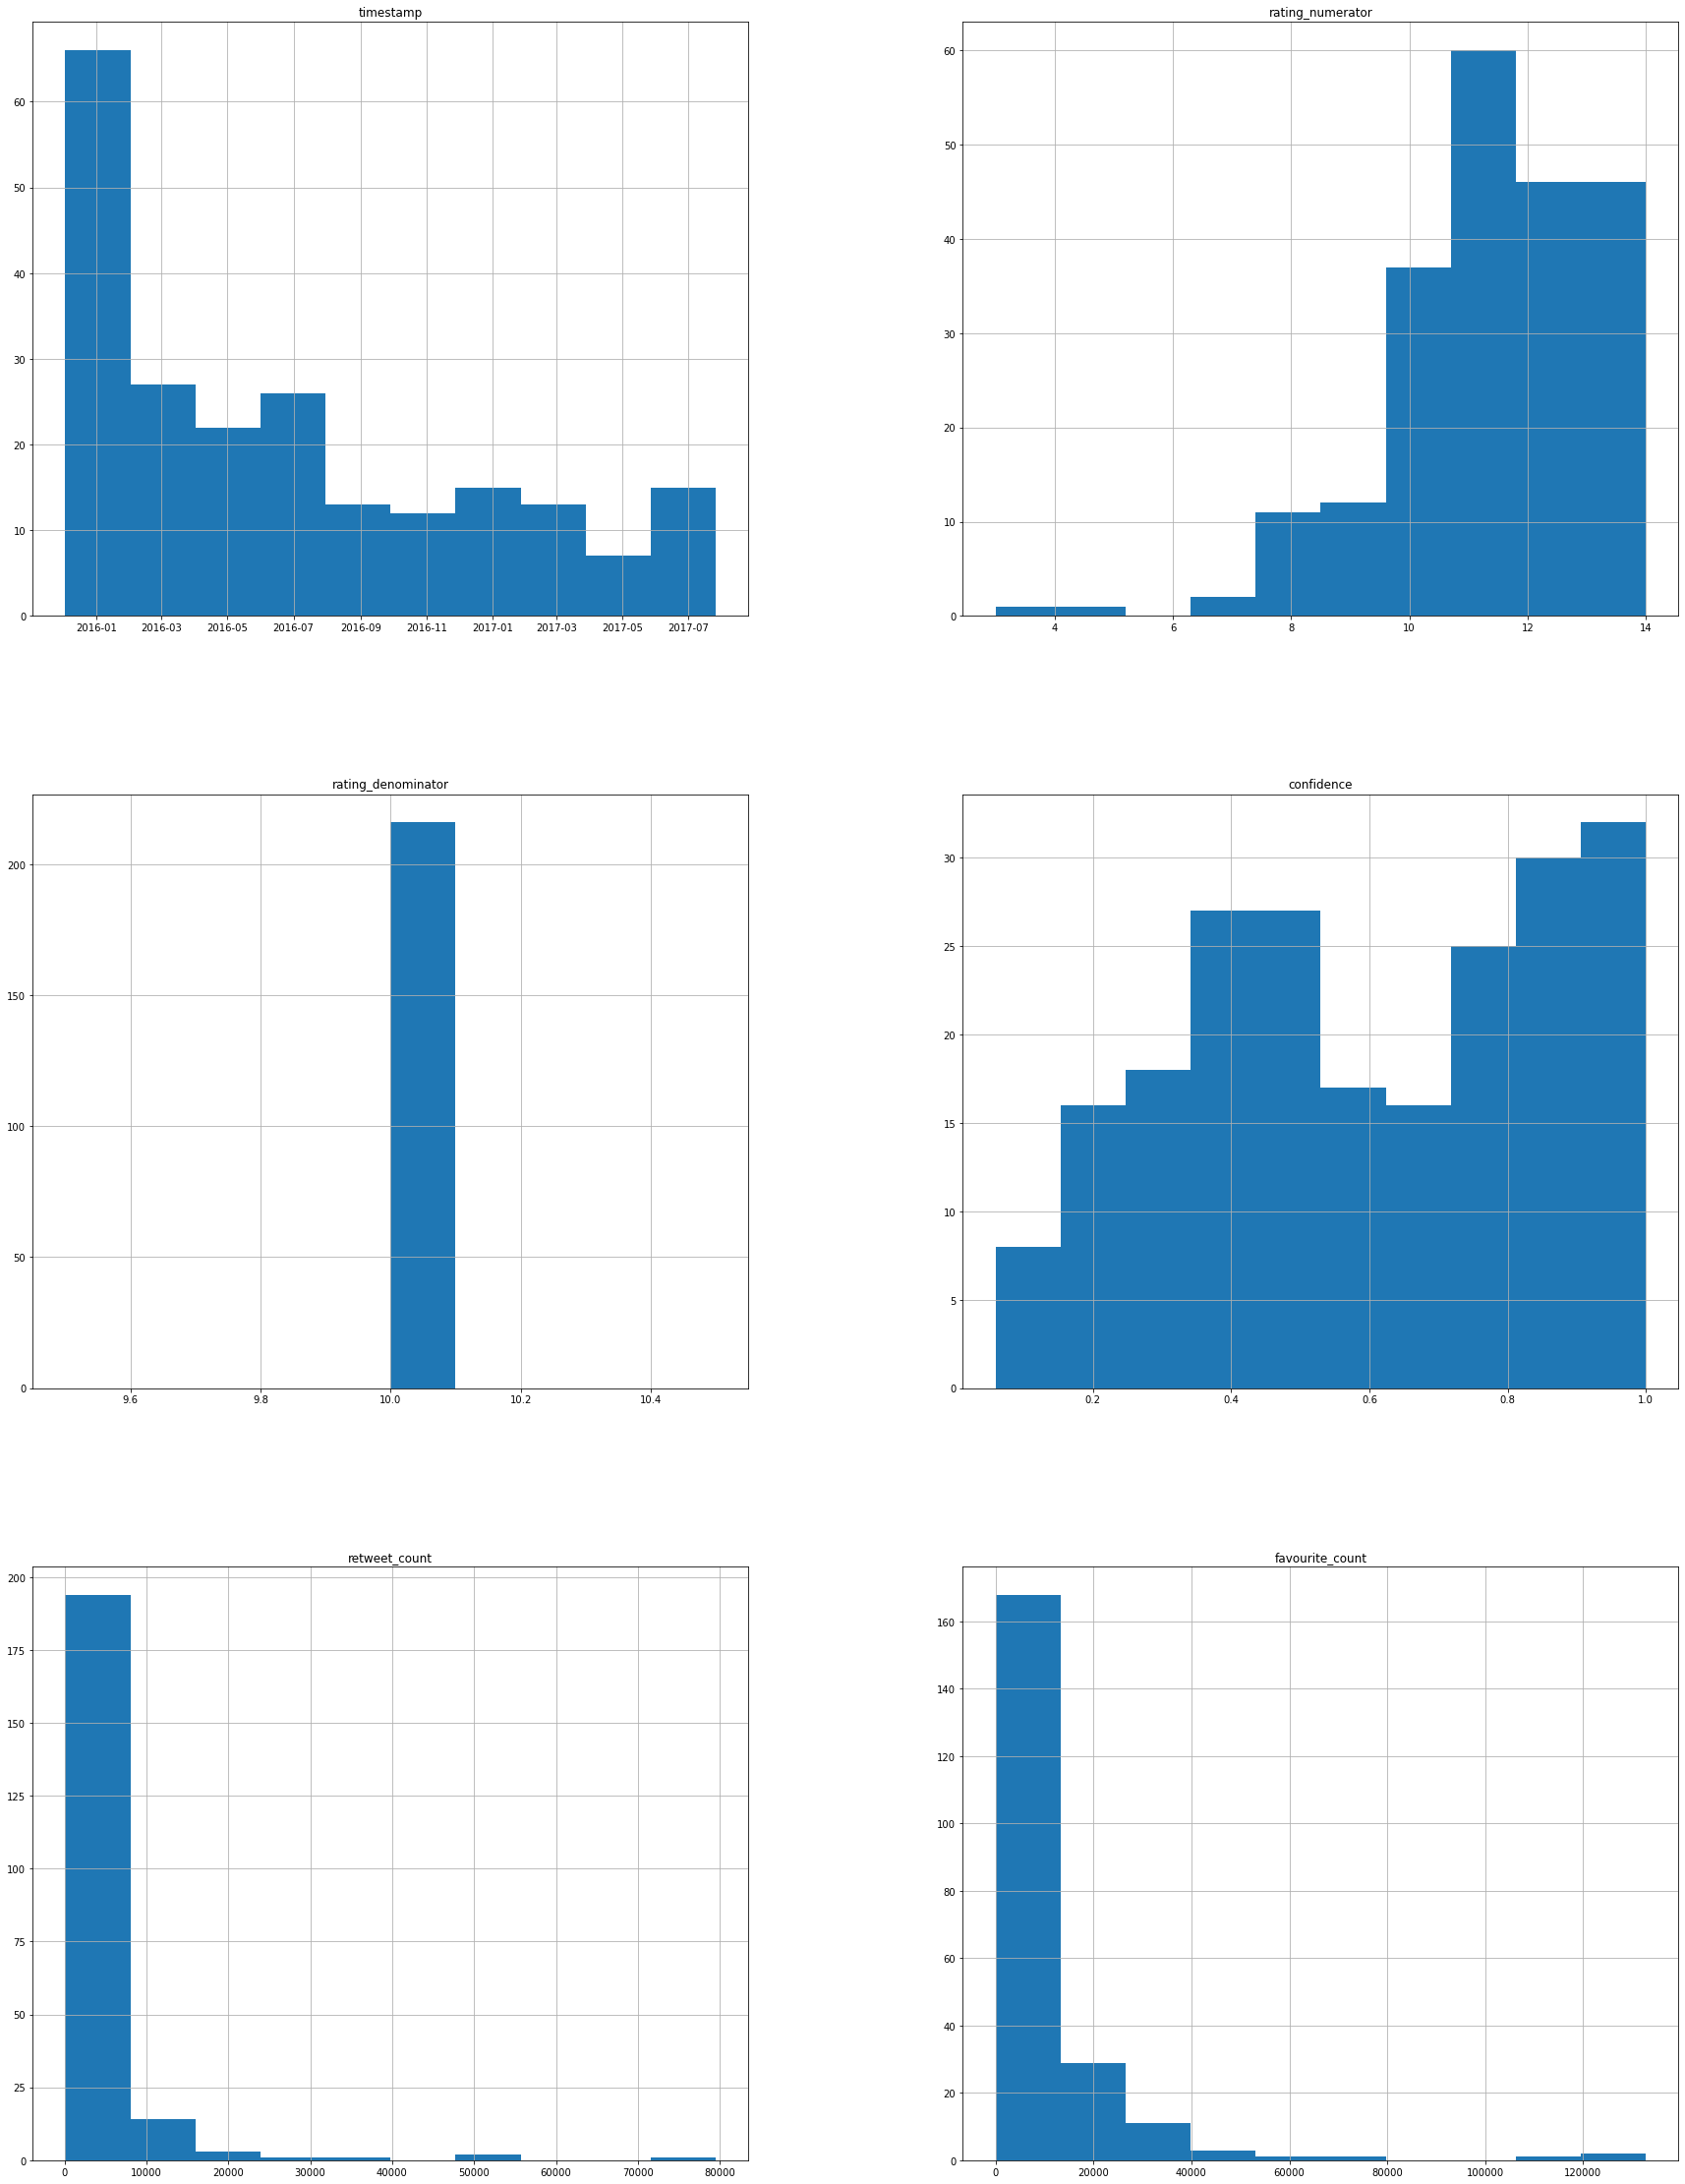

In [49]:
twitterArchive_clean.hist(figsize=(30,40));

### Insights:
1. More tweets in the months of jan 2016

2.

3.

### Visualization

In [53]:
data.dog_type.value_counts()

pupper     150
doggo       48
puppo       14
floofer      4
Name: dog_type, dtype: int64

c:\Users\Current\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


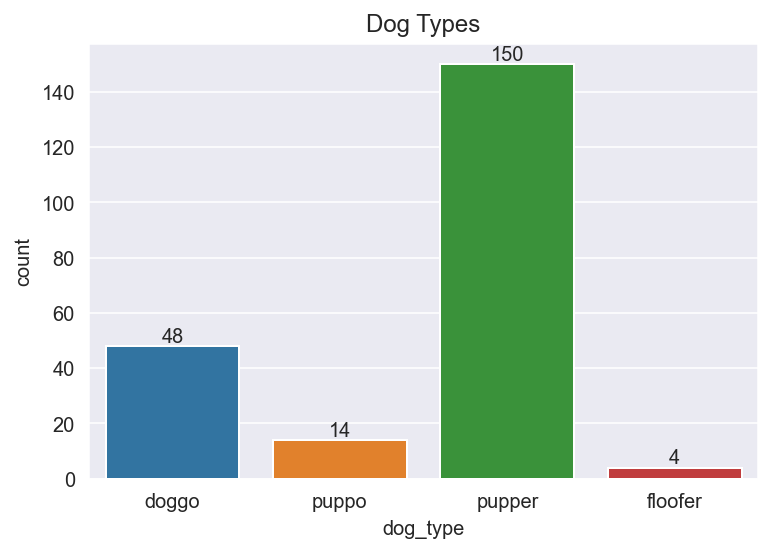

In [58]:
ax = sns.countplot(data['dog_type']);
plt.title('Dog Types')
for c in ax.containers:
    ax.bar_label(c);